# Using the datascience module to manipulate and visualize data

In this Jupyter notebook we will:
- Learn the basics of how to use Jupyter notebooks
- Use Berkeley's Data 8 `datascience` module to manipulate and visualize data using two examples: babynames and avocado prices.

Note: I have written this notebook in a way that is similar to a typical homework that I give my students to give a sense of what a typical homework assignment is like. If there are phrases that I use in this notebook that I have not fully defined, or if anything is not clear, please be sure to ask!


## Part 0: Using Jupyter notebooks

Before we dive into manipulating and visualizing data, let's discuss the basics of Jupyter notebooks. 



## Part 0.1: Markdown cells

Jupyter notebooks contain both Markdown and Code "cells". The Markdown cells  contain descriptions of your analyses (e.g., this is a Markdown cell). The Code cells contain code and can produce plots and tables of output which are also displayed in the notebook. You can switch a cell between Markdown and Code using the menu at the top of the Jupyter notebook editor. 

In Markdown cells, you can include special text formating including:
- *italic text*
- **bold text**
- [hyperlinks](http://info.cern.ch/hypertext/WWW/TheProject.html)
- $LaTeX$ characters: $\hat{p}$, $\pi$
- etc.



### Part 0.2: Code cells and your Python background

If we haven't done so yet, let's have a brief discussion about what everyone's experience is with Python. The Data 8 class does not assume any programming background in Python or any other langauge and teaches some basic Python programming along with Data Science skills (i.e., it is a very broad approach). 

In this workshop, we will adapt what we teach based on everyone's background. If you are already familar with some of the following basic concepts that will useful, and if not we can review them now:

- Assigning a string to a variable:  `my_string = "Hello, World!"`
- Creating a list in Python: `my_list` = [1, "Hello", True]
- Anything else anyone wants to discuss


In [1]:
my_string = "Hello, World!"
print(my_string)

my_list = [1, "Hello", True]
print(my_list)


Hello, World!
[1, 'Hello', True]


### Part 0.3: Magic commands (this can be skipped)

One an also include include [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html) in Code cells that add additional functionality such as:

- Timing how long code tasks using: `%timeit`
- Adding the ability for plots to show up in your document: `%matplotlib inline`
- Getting help for a function: `? function_name`

You can also use "tab completion" to see the methods an object has (this is a bit buggy so it does not always work).


## Part 1: Manipulating and visualizing data using the babynames data

Let's now learn how to use Berkeley's [datascience](http://data8.org/datascience/) package to manipulate and visualize data. 

The main object of interest in the `datascience` package is the [Table](http://data8.org/datascience/tables.html) object. Using the `Table` object we can doing the following operations on a data set:

|Description|Pseudo-code|
|-|-|
|Show the first few rows of a data table|`tb.show()`|
|Select a subset of columns|`tb.select("column1_name", "column2_name")`|
|Get a subset of rows (i.e., filter data)|`tb.where("column_name", value)`|
|Aggregrate data in many rows separately for different groups|`tb.group("column_name", agg_function)`|
|Relabel columns|`tb.relabel("original_col_name", "new_col_name")`|
|Create line plots|`tb.plot("x_col", "y_col")`|
|And much more|See examples below!|


Before we start let's import some packages, including the `datascience` package, that will give us the functionality that we need.


In [23]:
# importing packages that we will use 
from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make sure we can display figures in the Jupyter notebook
%matplotlib inline


### Part 1.1: Reading the babynames data into a Table object

As a first example, let's look at the babynames data set which has comes from 1880-2017 from the United States Social Security Administration.  We create a `Table()` object that contains data from the Internet or from a csv file on our computer using: `Table.read_table("url_or_csv_file")`. 

**Exercise 1.1**: The code below reads in the babynames data from the Internet into a variable called `babynames`. Please use the `tb.show(5)` method to show the first 5 rows of this table. 


In [24]:
# Load the data from the internet
babynames = Table.read_table("https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv")

# babynames = Table.read_table("babynames.csv")  # read from a csv file

# show the first five rows of the data
babynames.show(5)


### Part 1.2: Selecting a subset of rows from the babynames data

We can create a `Table` object that has a subset of rows using the `tb.where("column_name", value)` method. 

**Exercise 1.2**: See if you can get data from only people who are named *Andrea*. Save the output to a variable called `single_name`. 


Note, you can also use `datascience predicates` to get subsets of rows of data based on more complex criteria. Here is a list of predicates included in the `datascience` module:


|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|
|`are.contained_in`|`are.contained_in(make_array(10, 20))`|Find rows with values equal to 10 and 20|






In [4]:

single_name = babynames.where("name", "Andrea")

single_name.show(3)


# single_name = babynames.where("name", are.equal_to("Andrea"))  # alternatively

# get multiple names
#two_names = babynames.where("name", are.contained_in(["Ethan", "Andrea"]))  # alternatively
#two_names.show(3)


### Part 1.3: Aggregating data separately by group

If you look carefully at the `single_name` Table you created above, you will notice that there are entries for each year for the name "Andrea" when sex is "boy" and when sex is equal to "girl". Because of this, if we tried to plot the `percent` column as a function of the `year` we would end up with two entries for each year, which would yield a line that oscillates a lot since there are very different proportions of Andrea's that are boys and girls for each year.

There are a few ways we could deal with this issue. One way is to filter the data so that we only get "Andrea" of one of the sexes ("boy" or "girl"). Alternatively, we could add the percentages of "boy" and "girl" together separately for each year, to get a total percentage of boys and girls that are named Andrea for each year. Let's try this second approach. 

To summarize data separately based on the value of a particular column we can use the `tb.group("grouping_column", agg_function)` method. The first argument to this method is the column that we want to use to aggregate the data by. The second argument is the name of the function we want to use when aggregated the data in each group. 

**Exercise 1.3**: Get the sum of the percent of Andrea's for each year. Save the results in a variable called `single_name_summed` and print the first 3 rows of the table. Hint, Python's `sum` function will be useful here. 



In [5]:
single_name_summed = single_name.group("year", sum) 

single_name_summed.show(3)

### Part 1.4: Plotting data

The `Table` object also contains methods to plot data. In particular, we can create a line plot using the `tb.plot("x_col_name", "y_col_name")` method. 

**Exercise 1.4**: Please plot the percent of Andrea's as a function of the year. In the answer section below, please describe ways that this plot could be better. 

**Answer**

Note: you don't actually have to write your answer, but I wanted to demonstrate how I typically how I often structure homework problems for my students; i.e., I have them write code to show answer to questions, and then describe the answers in an answer section. 


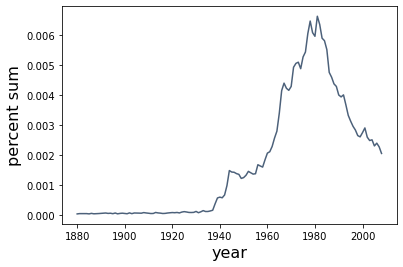

In [6]:

single_name_summed.plot("year", "percent sum")


### Part 1.5: Relabeling column names

One way that the above figure could be better is that the x and y axis labels could have [more informative names](https://xkcd.com/833/). One way to achieve this is to relabel the column names prior to plotting the data using the `tb.relabel("original_col_name", "new_col_name")` method.

**Exercise 1.5**: The code cell below create a copy of the `single_name_summed` table in a variable called `single_renamed`. Please relabel the columns of `single_renamed` to create more informative column names. Once you have done that, recreate your plot with more informative x and y axis names.


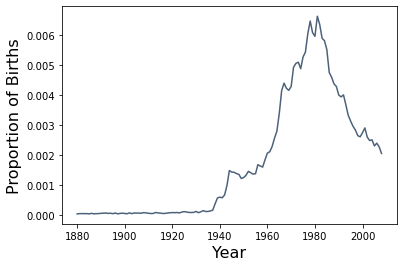

In [7]:
# Create a copy of the data
single_renamed = single_name_summed.copy()


# Rename the columns so that there are better names in the plots
single_renamed = single_renamed.relabel('year', 'Year')
single_renamed =  single_renamed.relabel('percent sum', 'Proportion of Births')

# Plot the results with more informative x and y axis label names
single_renamed.plot('Year', 'Proportion of Births');



### Part 1.6: Selecting a subset of columns and additional visualizations

There are a additional `Table` methods that can be used to create other visualizations. For example, we can create:
- boxplots using: `tb.boxplot()` 
- histograms using: `tb.hist()`

To use these methods, we need to make sure our table only has the columns we would to include in our visualization. For our `single_renamed` table, if we want to plot the proportion of births as a boxplot or histogram from all years, this means we should only have the `Proportion of Births` column in our table. To select a subset of columns from a table, we can use the method:
- `tb.select("column_name1", "column_name2")` 


**Exercise 1.6**: Please complete the following steps:

1. Create a Table called `single_col_tb` that only has the `Proportion of Births` column from the `single_renamed` table.
2. Create a boxplot of the `Proportion of Births` 
3. Create a histogram of the `Proportion of Births` 


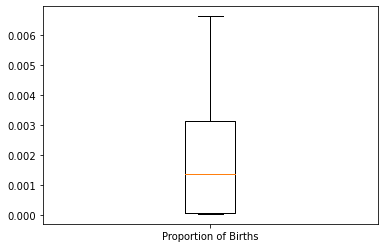

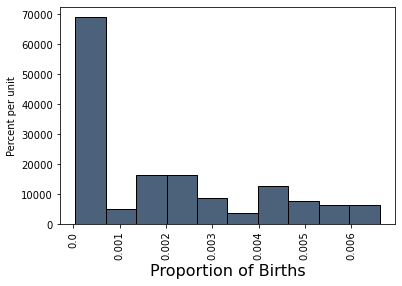

In [8]:

single_col_tb = single_renamed.select("Proportion of Births")

single_col_tb.boxplot()

single_col_tb.select("Proportion of Births").hist()


# Part 2: Manipulating and visualizing data using the avocado data

A constant challenge I face when teaching is trying to find material that my students can relate to. For example, a slogan I use in my Introductory Statistics class is "The Truth is out there" as a means to get students understanding that we are trying to estimate True parameter values based on "shaddow" sample statistics. This slogan comes from the X-Files, and of course only about 2% of my students know this. So how can I relate to the millennials that currently make up the majority of my students? 

It turns out that Millennials (at least a Yale) **LOVE** Avocado Toast. It is also well known that Millennials prefer to eat organic food when given the option. However, is the additional cost of eating organic avocados worth it? This is a question that Millennials in my classes find **fascinating** so exploring avocados prices is great way to relate to my students (at least for the next couple of years until they are replaced by Gen-Z students, in which case I guess I'll have to look for tiktok data?). 

Let's explore some avocado data now!


### Part 2.1: Loading the avocado data

The first steps in most analyses involves loading in data. Data on avocado prices can be found on this Kaggle page https://www.kaggle.com/neuromusic/avocado-prices. The page also includes a codebook explaining what all the variables in the data file mean. To save ourselves a little time, I have copied the data to our faculty development website: https://dsc-wav.github.io/facdev21/ 

**Exercise 2.1**: The code below creates a Table called `avocado` and shows the first 5 rows of the data. In the answer section below, describe what information the columns `AveragePrice`, `Total Volume`, `type` and `4046` contain - discussing the answers with your neighbors is highly encouraged! [Hint](https://memegenerator.net/img/instances/37641774.jpg)

**Answers**

- `AveragePrice`: the average price of a single avocado
- `Total Volume`: Total number of avocados sold
- `type`: whether a avocado is conventional or organic
- `4046`: Total number of avocados with PLU 4046 sold, where 4046 means non-organic small/medium Hass Avocados (~3-5 oz)


Also other column names in the table that are not clear are: 
- `4225`: Total number of avocados with PLU 4225 sold, where non-organic large Hass Avocados (~8-10 oz)
- `4770`: Total number of avocados with PLU 4770 sold, where non-organic extra large Hass Avocados (~10-15 oz)


In [9]:
avocado = Table.read_table("avocado.csv")

# convert the Date column to a "datatime" data type
avocado['Date'] = pd.to_datetime(avocado['Date'])

avocado.show(5)



# Ignore this (this will remove a warning later that arises in later exercises when plotting with dates)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


### Part 2.2: Relabeling columns

The column names `4046`, `4225` and `4770` are terrible names for columns because it is unclear what these numbers refer to!  

**Exercise 2.2**: The code below creates a copy of the `avocado` data and stores it in the name `avocado2`. Please relabel the columns `4046`, `4225` and `4770` of `avocado2` to have more meaningful names.


**Bonus question**: any ideas why it might be a good idea to start by copying the data rather than relabeling the original data when teaching data science? 


**Anwer**: The `tb.relabel` method modifies the column labels in the original Table, even if the result is saved to a new variable name; i.e., if we ran `avocado2 = avocado.relabel("4046", "sold_nonorg_sm")` both the variable `avocado2` and the variable `avocado` would refer to the same Table in memory and changes made to either variable would effect the other (i.e., the `tb.relabel` method returns a reference to a table). 

The reason that problematic when teaching data science is because if a student runs the same cell twice the column will already have been renamed so the original column name won't exist and Python will return an error. This can be confusing for students!


In [10]:
avocado2 = avocado.copy()

avocado2 = avocado2.relabel("4046", "sold_nonorg_sm")
avocado2 = avocado2.relabel("4225", "sold_nonorg_l")
avocado2 = avocado2.relabel("4770", "sold_nonorg_xl")

avocado2.show(3)


### Part 2.3: Reducing (filtering) the data to a smaller number of rows

The avocado data set contains data from many different parts of the country. The code below shows the names of the different regions where avocado prices were recorded as listed in the `region` column. Let's reduce the data to only the Northeastern United States. 

**Exercise 2.3**: Please filter the data to contain only prices from the Northeast and save the results in a variable `avocado3`. Also print the number of rows that `avocado3` Table has. 



In [11]:

print("Before:")
print(np.unique(avocado2["region"]))
print(avocado2.num_rows)


# add some filtering code
avocado3 = avocado2.where("region", "Northeast")

print("After:")
print(np.unique(avocado3["region"]))
print(avocado3.num_rows)


Before:
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']
18249
After:
['Northeast']
338


### Part 2.4: Selecting a subset of the columns

To make subsequent data processing easier, and to save computer memory, let's further reduce our table to have the following columns:

- Date
- AveragePrice
- Total Volume
- type

**Exercise 2.4**: Create a Table `avocado4` that only has the columns listed above. Then show the first 5 rows of this table.



In [12]:

avocado4 = avocado3.select("Date", "AveragePrice", "Total Volume", "type")

avocado4.show(5)


### Part 2.5: Creating separate tables for conventional and organic avocados

To aid further analyses, let's create separate tables that have the conventional and organic avocados.

**Exercise 2.5**: Please create a table called `conventional` that only has data from conventional avocados, and a table called `organic` that only has data from organic avocados. Then print the number of rows in each table. Are there the same number of rows. Does this make sense? 


In [13]:
conventional = avocado4.where("type", "conventional")
organic = avocado4.where("type", "organic")

print(conventional.num_rows)
print(organic.num_rows)


169
169


### Part 2.6: Supply and demand

Econ 101 tells us that if something costs more we will buy less of it. Is this true for avocados? 

**Exercise 2.6**: See if you can create a visualization examining whether less avocados are sold when the price is higher.

Also visualize the price of avocados as a function of the date. Hint: `tb.scatter("col_name1", "col_name2")` and `tb.plot("col_name1", "col_name2")` could be useful here. Which type of plot do you think is a better way to visualize this data?


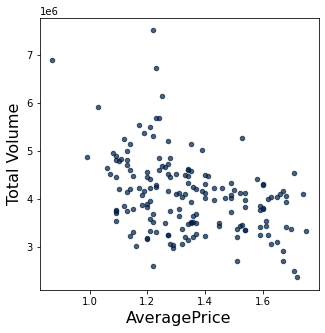

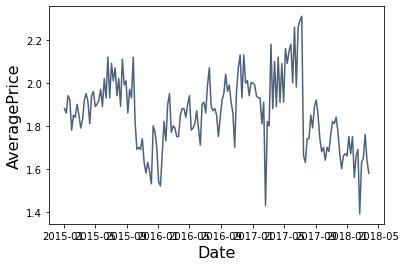

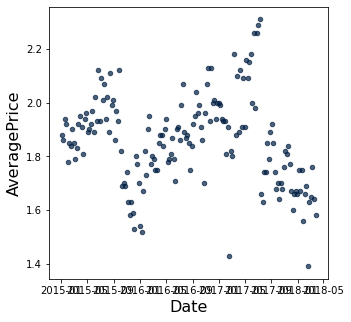

In [25]:
conventional.scatter("AveragePrice", "Total Volume")

# have them compare these, which is more insightful? !!!
organic.plot("Date", "AveragePrice")
organic.scatter("Date", "AveragePrice")


### Part 2.7: Joining Tables

In order to compare the prices of conventional and organic avocados, it would be useful to have the data in a Table where each row has data from a given date, and there are columns of the prices for both the conventional and organic avocados. One way we can create this "wide" table is to join together the `conventional` Table object with the `organic` Table object based on their common dates. 

To join to Tables together using the datascience packages we can use the `tb1.join('join_col_name', tb2)` method. Where:
- `tb1` is the first table we want to join
- `join_col_name` is the name of the column that both tables have in common
- `tb2` is the second column we want to join on

Note: if you are familiar with joins, this does an "inner join". 

**Exercise 2.7**: Please create an variable `wide_data` that has the data from `conventional` Table object with the `organic` Table object joined together. Then print the first 5 rows of this table. 




In [15]:
wide_data = conventional.join('Date', organic)

wide_data.show(5)


### Part 2.8: Are organic avocados really more expensive? 

Now we are ready to address our question of interest, are organic avocados really more expensive and by how much! Let's start addressing this question by visualizing the data and overlapping histograms. 

**Exercise 2.8**: Please complete the following steps to create a plot that has overlapping histograms of the conventional and organic avocado prices. 

1. Create a variable called `wide_data2` that is a copy of the `wide_data` table.
2. Label the column that has the price of conventional avocados as "Conventional Price"
3. Label the column that has the price of organic avocados as "Organic Price"
4. Create a table that only has the columns "Conventional Price" and "Organic Price"
5. Use the tb.hist() method to plot overlapping histogram of the conventional and organic avocado prices


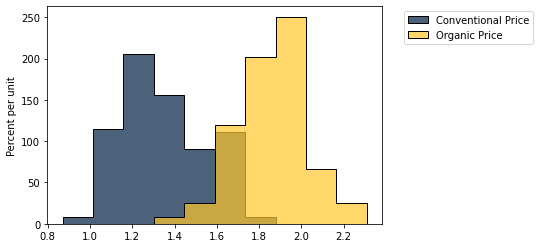

In [16]:
wide_data2 = wide_data.copy()
wide_data2 = wide_data2.relabel("AveragePrice", "Conventional Price")
wide_data2 = wide_data2.relabel("AveragePrice_2", "Organic Price")

# poor label choice
#wide_data2.select("AveragePrice", "AveragePrice_2").hist()

# better!
wide_data2.select("Conventional Price", "Organic Price").hist()


### Part 2.9: Are organic avocados really more expensive? Additional visualizations... 

**Exercise 2.9**: See if you can create 1 or two additional visualizations comparing conventional and organic avocado prices. 


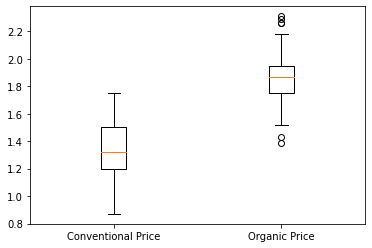

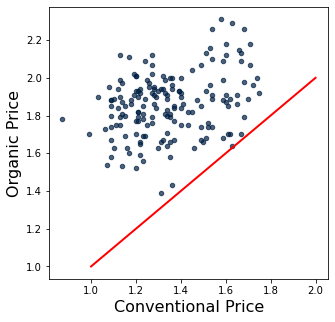

In [17]:

# plot 1
wide_data2.select("Conventional Price", "Organic Price").boxplot()

# plot 2
wide_data2.scatter("Conventional Price", "Organic Price")
# cheating and using matplotlib here 
plt.plot([1, 2], [1, 2], 'r-', lw=2);


### Part 2.10: Getting difference in conventional and organic prices for each date

Another way we can assess whether organic avocados are more expensive than conventional avocados is to compare their prices on each date. If for each date, the organic price is greater than the conventional prices, or equivalently, if the organic price minus the conventional price is always positive, then this is clear evidence that organic avocados are more expnesive. 

To examine this in Python, we can pull a `NumPy ndarray` out of our Table using the syntax: `my_array = tb["colum_name"]`. A NumPy ndarray is just a ordered sequence of values that all have the same type; e.g., a sequence of values that are all numbers, or a sequence of values that are all character strings, etc. If we have two ndarrays of the same length called `my_array1` and `my_array2`, then we can create an ndarray that has the differences between the values in the two arrays using  `diff_array = my_array1 - my_array2`; i.e., the `diff_array` will be of the same length as `my_array1` and `my_array2` and each entry in the array will be the difference between two of the values in `my_array1` and `my_array2`.  


**Exercise 2.10**: Please complete the following steps to create an ndarray called `price_difference` that has the difference in prices of organic and conventional avocados for each date:

1. Extract an ndarray from the `wide_data2` table that has the prices of organic avocados and store it in a variable called `organic_array`. 
2. Extract an ndarray from the `wide_data2` table that has the prices of conventional avocados and store it in a variable called `conventional_array`. 
3. Create a variable called `price_difference` that is an ndarray that has the difference in prices between the organic and conventional avocados.
4. Use the `min` and `max` functions to find what the minimum and maximum price differences are. Does this provide evidence that organic avocados are always more expensive? 


In [18]:

organic_array = wide_data2['Organic Price']
conventional_array = wide_data2['Conventional Price'] 

price_differences = organic_array - conventional_array

print(min(price_differences))
print(max(price_differences))



0.010000000000000009
0.9900000000000002


### Part 2.11: Adding a column that has the difference in organic and conventional prices our wide data Table

Now that we have an ndarray of price differences, we can add these price differences back as a column to our wide data table. To add an ndarray to a Table, we can use `tb.append_column("new_col_name", ndarray_to_add)`; note: the `ndarray_to_add` needs to have the same number of elements as the number of rows in `tb`.

**Exercise 2.11**: Please create a new variable `wide_data3` that consists of the data in the Table `wide_data2` along with a new column called `Price difference` which is the difference in organic and conventional avocado prices. Once you have adding this column, using the `tb.boxplot` method to create a boxplot of the difference in avocado prices. Hint: be sure to only select the `Price difference` column before trying to create the boxplot. 



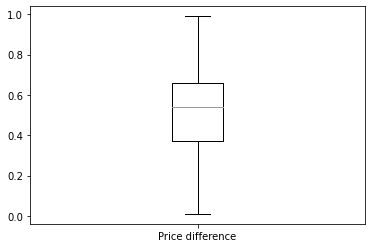

In [19]:
wide_data3 = wide_data2.append_column("Price difference", price_differences)

wide_data3.select("Price difference").boxplot()


### Part 2.12: Calculating summary statistics

We can calculate summary statistics, such as the mean and standard deviation, on values in a Table using `tb.mean()` and `tb.std()`. These methods will only work if all columns in the table are numerical values, and they will calculate the summary statistics across all columns. 

**Exercise 2.12**: Using the `wide_data2` table, calculate the mean and standard deviation of the conventional prices and organic prices. To be able to see multiple results in your Jupyter notebook, use the `tb.show()` method.


In [22]:

wide_data2.select("Conventional Price", "Organic Price").mean().show()
wide_data2.select("Conventional Price", "Organic Price").std().show()


### Part 2.13: Calculating summary statistics II

As we discussed in part 1.3, we can also calculate summary statistics on a Table using the `tb.group()` method. Let's try that approach here as well.

**Exercise 2.13**: Use the `avocado4` table to calculate the mean conventional and organic avocado prices. The aggregation function that you should use is the `np.mean` function which is the mean function from the NumPy package.


In [21]:
avocado4.select("AveragePrice", "type").group("type", np.mean)

type         | AveragePrice mean
conventional | 1.34444
organic      | 1.85941

### Part 2.14: Explore on your own! 

Try exploring the data further to see if you can find anything else interesting in it! 

Other types of analyses that could be done on the data include running a hypothesis on the data, for example, to see if there is a statistically significant difference between the organic and conventional avocado prices. The Berkeley Data 8 class discusses how to use randomization methods to run such hypothesis tests (although personally I think it might be better to leave hypothesis tests to an Intro Stats class!). 


<img src="https://i.pinimg.com/originals/0a/77/b6/0a77b64934d50bc48abebbbbe08c9a33.jpg" width=500 height=500>